# Classification by Perceptron

![](banner_perceptron.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

options(digits=10, scipen=100) # expose many digits, use scientific notation sparingly
update_geom_defaults("point", list(size=3, colour="grey50"))
update_geom_defaults("path", list(color="black"))

== document setup ==

## Introduction

## Synopsis

**Terms**

* **Perceptron or Perceptron Model:** a 1-layer neural network
* **Perceptron Method:** a specific method to find weights for a perceptron model

## Exposition

### Perceptron Model

#### Form

A perceptron is a special type of model inspired by biological neural networks.  It comprises ...
* Input nodes
* Output node
* Connections (between input and output nodes)
* Weights (one weight on each connection)
* Activation function (on output nodes, to rescale values to make them interpretable as probabilities)

,to_output
,0.5205288178
from_input_x1,0.6444660175
from_input_x2,-0.1743033147


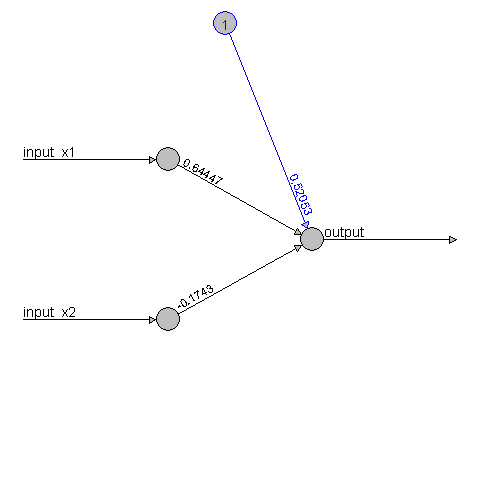

In [2]:
set.seed(12345)

ann = data.frame(input_x1=1, input_x2=1, output=1)
model = neuralnet(output ~ input_x1+input_x2, ann, hidden=0)

d = as.data.frame(model$weights[[1]][[1]]); names(d) = "to_output"; rownames(d) = c("","from_input_x1", "from_input_x2")
d %>% caption("weights", row.names=TRUE)

output_size(4,4)
plot(model, rep=1, fill="gray", show.weights=TRUE, information=FALSE, arrow.length=0.3, cex=0.7, lwd=0.5)
output_size(restore)

#### Choice of Activation Function

Popular choices of activation function include ... 
* sigmoid function
* hyperbolic tangent function

**Sigmoid Function**

A sigmoid activation function rescales any incoming value into range 0 to 1.  The sigmoid function is also known as the logistic function.

sigmoid:  $\large \frac{1}{1+{e}^{−x}}$

sigmoid range: $0 < sigmoid(x) < 1$, for any $x$

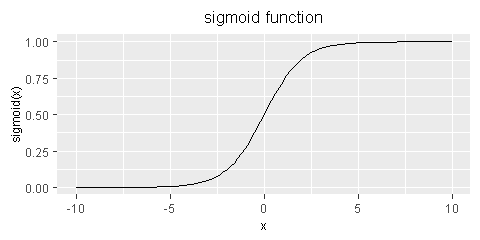

In [3]:
output_size(4,2)
ggplot(data.frame(0)) + ggtitle("sigmoid function") + xlab("x") + ylab("sigmoid(x)") + xlim(-10,10) +
stat_function(fun=sigmoid)  
output_size(restore)

**Hyperbolic Tangent Function**

A hyperbolic tangent activation function rescales any incoming value into range -1 to 1.

tanh:  $\large \frac{e^{2x}-1}{e^{2x}+1}$

tanh range: $-1 < tanh(x) < 1$, for any $x$

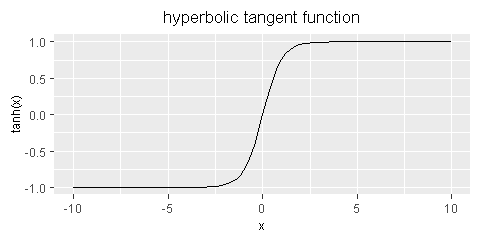

In [4]:
output_size(4,2)
ggplot(data.frame(0)) + ggtitle("hyperbolic tangent function") + xlab("x") + ylab("tanh(x)") + xlim(-10,10) +
stat_function(fun=tanh)  
output_size(restore)

#### Computing Weights

To compute weights for a perceptron model, apply the perceptron method ...

* Perceptron method

#### Computing Ouput

Compute output as the activation function applied to the weighted sum of inputs.

$r = f(w_0 + \sum{{w_j}{x_j}})$

where ...
* $r$ is the output of the output
* $f$ is the activation function
* $w_0$ is an offset value for the output node
* $w_j$ is the $j^{th}$ weight for the output node
* $x_j$ is the $j^{th}$ input to the output node

#### Predicting 

To classify a new observation ...
* Use the new observation as input to the perceptron model
* Compute the output
* Interpret the output as a probability and combine with a cutoff to predict the new observation's class  

### Perceptron Method

The preceptron method calculates weights for a perceptron model.

#### Details of Perceptron Method

_**Configure:**_
* Choose the activation function to be the sigmoid function.
* Choose a cutoff value (in range 0 to 1).

_**Initialize:**_
* Convert class values to binary (0 or 1).
* Assign random weights to connections.

_**Iterate:**_ 
* Do the following many times ...
  * Randomly reorder the training data observations.
  * For each observation ...
    * Compute the output.
    * Convert the output to a predicted class (binary) based on the cutoff value.
    * Compare the output to the observation's actual class (binary). The difference is the error.
    * If the observation's predicted and actual classes do not match, then compute new weights based on the current weights, the error, and the observation.  These new weights become the current weights for computing the next observation's output.

_**Result:**_
* Set the model weights to be the weights calculated based on the last observation of teh last iteration.

#### Example Application of Perceptron Method on Linearly Separable Data

##### Data

Training data are already classified.  New observation is not yet classified.  Note, these data are linearly separable, i.e., you can use a straight line to separate observations by class. 

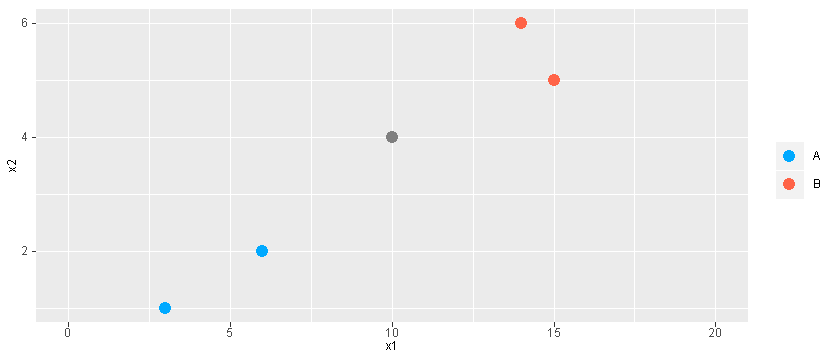

In [5]:
data.simple = data.frame(x1=c(3,6,14,15), x2=c(1,2,6,5), class=c("A", "A", "B", "B"))
new = data.frame(x1=10, x2=4)

ggplot(data.simple) + xlim(0,20) +
geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=x1, y=x2), data=new)

##### Configure

Here, we choose the configuration to be ...

* Activation function: sigmoid
* Cutoff for A: 0.5

##### Initialize

Here, we randomly assign weights like this.

In [6]:
# Configure & initialize perceptron method

set.seed(12345)

cutoff.A = 0.5
iteration = 0
status = data.frame(x1=data.simple$x1, x2=data.simple$x2, class=data.simple$class, class.bin=as.binary(data.simple$class, "A"), w0=NA, w1=NA, w2=NA, out=NA, error=NA, cutoff.A, class.bin.predicted=NA)
w0.current = runif(1); w1.current = runif(1); w2.current = runif(1)

data.frame(w0.current, w1.current, w2.current) %>% caption("Initial weights:", position="left")
status %>% caption("Status at iteration 0:", position="left")

w0.current,w1.current,w2.current
0.7209038963,0.8757731931,0.7609823283


x1,x2,class,class.bin,w0,w1,w2,out,error,cutoff.A,class.bin.predicted
3,1,A,1,NA,NA,NA,NA,NA,0.5,NA
6,2,A,1,NA,NA,NA,NA,NA,0.5,NA
14,6,B,0,NA,NA,NA,NA,NA,0.5,NA
15,5,B,0,NA,NA,NA,NA,NA,0.5,NA


##### Iterate

_**Itertion 1**_

Observations are randomly reordered like this:
* 1st observation --> 3rd position
* 2nd observation --> 2nd position
* 3rd observation --> 4th position
* 4th observation --> 1st position

The 1st observation (formerly the 4th observation) is x1=15, x2=5.  Input this observation into the neural network model, assuming the current weights.  The output is computed as $sigmoid(0.72 + 0.87 \times 15 + 0.76 \times 5) = 0.99$.  Assuming $cutoff=0.5$, the predicted class (binary) is $1$ because $0.99 > 0.5$.  This is a misclassification because $1 \ne 0$, with the error $0 - 0.99 = -0.99$, causing new weights to be computed.

The new weights are ...
  * $w0_{new} = 0.72 + -0.99 = -0.28$
  * $w1_{new} = 0.87 + (15 \times -0.99) = -14.12$
  * $w2_{new} = 0.76 + (5 \times -0.99) = -4.24$
  
The 2nd observation (formerly the 2nd observation) is x1=6, x2=2.  Input this observation into the neural network model, assuming the (recalculated) current weights.  The output is $sigmoid(-0.28 + -14.12 \times 6 + -4.24 \times 2) = 0.00$.  Assuming $cutoff=0.5$, the predicted class (binary) is $0$ because $0.00 < 0.5$.  This is a misclassification because $0 \ne 1$, with the error $1 - 0.00 = 1.00$, causing new weights to be computed.

The new weights are ...
  * $w0_{new} = -0.28 + 1.00 = 0.72$
  * $w1_{new} = -14.12 + (6 \times 1.00) = -8.12$
  * $w2_{new} = -4.24 + (2 \times 1.00) = -2.24$
  
The 3rd observation (formerly the 1st observation) is x1=3, x2=1.  Input this observation into the neural network model, assuming the (recalculated) current weights.  The output is $sigmoid(0.72 + -8.12 \times 3 + -2.24 \times 1) = 0.00$.  Assuming $cutoff=0.5$, the predicted class (binary) is $0$ because $0.00 < 0.5$.  This is a misclassification because $0 \ne 1$, with the error $1 - 0.00 = 1.00$, causing new weights to be computed.

The new weights are ...
  * $w0_{new} = 0.72 + 1.00 = 1.72$
  * $w1_{new} = -8.12 + (3 \times 1.00) = -5.12$
  * $w2_{new} = -2.24 + (1 \times 1.00) = -1.24$
  
The 4th observation (formerly the 3rd observation) is x1=14, x2=6.  Input this observation into the neural network model, assuming the (recalculated) current weights.  The output is $sigmoid(1.72 + -5.12 \times 14 + -1.24 \times 6) = 0.00$.  Assuming $cutoff=0.5$, the predicted class (binary) is $0$ because $0.00 < 0.5$.  This is a correct classification, so no new weights are computed.

_**Subsequent Iterations**_

Note that the weights stablize by iteration 8.

In [7]:
# Configure & initialize perceptron method

set.seed(12345)

cutoff.A = 0.5
iteration = 0
status = data.frame(x1=data.simple$x1, x2=data.simple$x2, class=data.simple$class, class.bin=as.binary(data.simple$class, "A"), w0=NA, w1=NA, w2=NA, out=NA, error=NA, cutoff.A, class.bin.predicted=NA)
w0.current = runif(1); w1.current = runif(1); w2.current = runif(1)


# Iterate perceptron method

for (iteration in 1:8)

  { if (iteration==1) status = status[c(4,2,1,3),]
    else              status = status[sample(nrow(status)),]

    for (obs in 1:4)
      { status$w0[obs] = w0.current; status$w1[obs] = w1.current; status$w2[obs] = w2.current
        status$out[obs] = sigmoid(status$w0[obs] + status$w1[obs]*status$x1[obs] + status$w2[obs]*status$x2[obs])    
        status$error[obs] = status$class.bin[obs] - status$out[obs]
        status$class.bin.predicted[obs] = as.numeric(status$out[obs] >= cutoff.A)
        if (status$class.bin.predicted[obs] != status$class.bin[obs])
          { w0.current = status$w0[obs] + status$error[obs]
            w1.current = status$w1[obs] + status$error[obs]*status$x1[obs]
            w2.current = status$w2[obs] + status$error[obs]*status$x2[obs] } }
   
   if (iteration %in% list(1,2,8)) 
     status %>% caption(sprintf("Status at iteration %d:", iteration), "left") }

x1,x2,class,class.bin,w0,w1,w2,out,error,cutoff.A,class.bin.predicted
15,5,B,0,0.7209038963,0.8757731931,0.7609823283,0.9999999787,-0.9999999787,0.5,1
6,2,A,1,-0.2790960824,-14.1242264867,-4.2390175649,0.0000000000,1.0000000000,0.5,0
3,1,A,1,0.7209039176,-8.1242264867,-2.2390175649,0.0000000000,1.0000000000,0.5,0
14,6,B,0,1.7209039176,-5.1242264867,-1.2390175649,0.0000000000,0.0000000000,0.5,0


x1,x2,class,class.bin,w0,w1,w2,out,error,cutoff.A,class.bin.predicted
6,2,A,1,1.720903918,-5.1242264867,-1.2390175649,0.0000000000,1.0000000000,0.5,0
14,6,B,0,2.720903918,0.8757735133,0.7609824351,0.9999999968,-0.9999999968,0.5,1
15,5,B,0,1.720903921,-13.1242264414,-5.2390175455,0.0000000000,0.0000000000,0.5,0
3,1,A,1,1.720903921,-13.1242264414,-5.2390175455,0.0000000000,1.0000000000,0.5,0


x1,x2,class,class.bin,w0,w1,w2,out,error,cutoff.A,class.bin.predicted
15,5,B,0,6.709136655,-0.1924080013,-2.261744732,0.0005607318,-0.0005607318,0.5,0
6,2,A,1,6.709136655,-0.1924080013,-2.261744732,0.7371483164,0.2628516836,0.5,1
14,6,B,0,6.709136655,-0.1924080013,-2.261744732,0.0000708380,-0.0000708380,0.5,0
3,1,A,1,6.709136655,-0.1924080013,-2.261744732,0.9795711733,0.0204288267,0.5,1


##### Results

The model weights are then set to be the weights calculated based on the last observation of the last iteration.

In [8]:
w0=status$w0[4]
w1=status$w1[4]
w2=status$w2[4]

data.frame(w0, w1, w2) %>% caption("Final weigts:", position="left")

w0,w1,w2
6.709136655,-0.1924080013,-2.261744732


,to_output
,6.7091366548
from_input_x1,-0.1924080013
from_input_x2,-2.2617447321


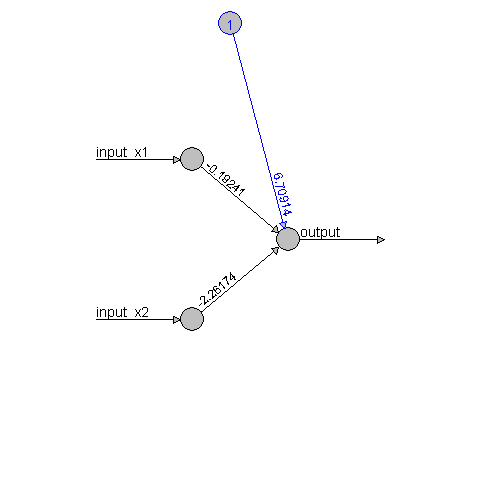

In [9]:
ann = data.frame(input_x1=1, input_x2=1, output=1)
model = neuralnet(output ~ input_x1+input_x2, ann, hidden=0)
model$weights[[1]][[1]][,1]= c(w0, w1, w2)

d = as.data.frame(model$weights[[1]][[1]]); names(d) = "to_output"; rownames(d) = c("","from_input_x1", "from_input_x2")
d %>% caption("weights", row.names=TRUE)

output_size(4,4)
plot(model, rep=1, fill="gray", show.weights=TRUE, information=FALSE, cex=0.7, lwd=0.5)
output_size(restore)

##### Prediction

Use the model to predict the new observation's class.

In [10]:
output = sigmoid(w0 + w1*new$x1 + w2*new$x2)
class.predicted = as.class(data.frame("A"=output, "B"=1-output), "A", cutoff.A)
                           
data.frame(x1=new$x1, x2=new$x2, output, cutoff.A, class.predicted)

x1,x2,output,cutoff.A,class.predicted
10,4,0.01389926866,0.5,B


#### Example Application of Perceptron Method on Not Linearly Separable Data

##### Data

Note, these data are not linearly separable, i.e., you cannot separate the clusters by a straight line.

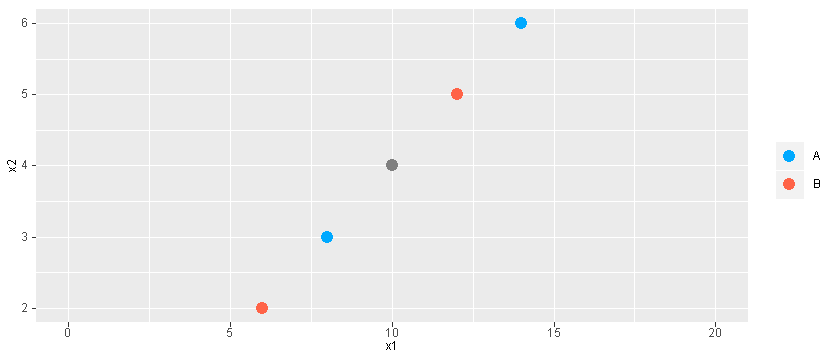

In [11]:
data = data.frame(x1=c(6,8,14,12), x2=c(2,3,6,5), class=c("B", "A", "A", "B"))
new = data.frame(x1=10, x2=4)

ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=x1, y=x2), data=new) 

##### Configure, Initialize, and iterate.

Note that weights not do stablize.  (Weights align at iterations 63, 67, and 88, but subsequently diverge.)

In [12]:
# Configure & initialize perceptron method

set.seed(12345)

cutoff.A = 0.5
iteration = 0
status = data.frame(x1=data$x1, x2=data$x2, class=data$class, class.bin=as.binary(data$class, "A"), w0=NA, w1=NA, w2=NA, out=NA, error=NA, cutoff.A, class.bin.predicted=NA)
w0.current = runif(1); w1.current = runif(1); w2.current = runif(1)

data.frame(w0.current, w1.current, w2.current)
status

w0.current,w1.current,w2.current
0.7209038963,0.8757731931,0.7609823283


x1,x2,class,class.bin,w0,w1,w2,out,error,cutoff.A,class.bin.predicted
6,2,B,0,NA,NA,NA,NA,NA,0.5,NA
8,3,A,1,NA,NA,NA,NA,NA,0.5,NA
14,6,A,1,NA,NA,NA,NA,NA,0.5,NA
12,5,B,0,NA,NA,NA,NA,NA,0.5,NA


In [13]:
# Configure & initialize perceptron method

set.seed(12345)

cutoff.A = 0.5
iteration = 0
status = data.frame(x1=data$x1, x2=data$x2, class=data$class, class.bin=as.binary(data$class, "A"), w0=NA, w1=NA, w2=NA, out=NA, error=NA, cutoff.A, class.bin.predicted=NA)
w0.current = runif(1); w1.current = runif(1); w2.current = runif(1)


# Iterate perceptron method

for (iteration in 1:1000)

  { status = status[sample(nrow(status)),]

    for (obs in 1:4)
      { status$w0[obs] = w0.current; status$w1[obs] = w1.current; status$w2[obs] = w2.current
        status$out[obs] = sigmoid(status$w0[obs] + status$w1[obs]*status$x1[obs] + status$w2[obs]*status$x2[obs])    
        status$error[obs] = status$class.bin[obs] - status$out[obs]
        status$class.bin.predicted[obs] = as.numeric(status$out[obs] >= cutoff.A)
        if (status$class.bin.predicted[obs] != status$class.bin[obs])
          { w0.current = status$w0[obs] + status$error[obs]
            w1.current = status$w1[obs] + status$error[obs]*status$x1[obs]
            w2.current = status$w2[obs] + status$error[obs]*status$x2[obs] } } }

 status %>% caption(sprintf("Status at iteration %d:", iteration), "left")

x1,x2,class,class.bin,w0,w1,w2,out,error,cutoff.A,class.bin.predicted
8,3,A,1,-47.29087264,-10.671048565,42.99934799,0.0250572096,0.9749427904,0.5,0
14,6,A,1,-46.31592985,-2.871506241,45.92417636,1.0000000000,0.0000000000,0.5,1
6,2,B,0,-46.31592985,-2.871506241,45.92417636,1.0000000000,-1.0000000000,0.5,1
12,5,B,0,-47.31592985,-8.871506241,43.92417636,1.0000000000,-1.0000000000,0.5,1


### About the Perceptron Method

* The perceptron method will converge if the data are linearly separable, given enough iterations.  Though it will converge, it may not converge to the optimal solution.
* The perceptron method will not converge if the data are not linearly separable.
* The perceptron method's performance and results are affected by the order of observations.

## Code

### Useful Functions

In [14]:
# as.binary # from apparatus code cell above
# as.class # from apparatus code cell above

# help(neuralnet, package="neuralnet")
# help(predict.nn, package="neuralnet") # use predict to call thsi function
# help(plot.nn, package="neuralnet") # use plot to call this function

## Expectations

Know about this:
* How the perceptron method works, conceptuallly
* How to determine weights for a perceptron model using the perceptron method, mechanically 

## Further Reading

* https://www.youtube.com/watch?v=pgDE2DOICuc
* http://ciml.info/dl/v0_99/ciml-v0_99-ch04.pdf
* http://ciml.info/dl/v0_99/ciml-v0_99-ch10.pdf
* http://blog.refu.co/?p=935
* http://blog.refu.co/?p=931
* https://en.wikipedia.org/wiki/Perceptron
* https://en.wikipedia.org/wiki/Multilayer_perceptron
* https://www.r-bloggers.com/using-neural-networks-for-credit-scoring-a-simple-example/
* https://datascienceplus.com/fitting-neural-network-in-r/
* http://www.learnbymarketing.com/tutorials/neural-networks-in-r-tutorial/
* https://cran.r-project.org/web/packages/neuralnet/neuralnet.pdf
* http://www-stat.wharton.upenn.edu/~stine/mich/DM_06.pdf
* https://www.r-bloggers.com/multilabel-classification-with-neuralnet-package/
* https://www.digitaljunky.io/playing-around-with-neural-networks-and-r/
* https://stackoverflow.com/questions/26047901/r-error-in-nroww-ncolw-non-numeric-argument-to-binary-operator-while-u

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised October 11, 2019
</span>
</p>